# ML Workflow

The objective of this exercise is to use the tools and methods that you learned during the previous weeks, in order to solve a **real challenge**.

The problem to solve is a **Kaggle Competition**: [New York City Taxi Fare Prediction](https://www.kaggle.com/c/new-york-city-taxi-fare-prediction). The goal is to predict the fare amount (inclusive of tolls) for a taxi ride in New York City given the pickup and dropoff locations.

Building a machine learning model requires a few different steps.

## Steps
1. Get the data
2. Explore the data
3. Data cleaning
4. Evaluation metric
5. Model baseline
6. Build your first model
7. Model evaluation
8. Kaggle submission
9. Model iteration

## 1. Get the data <a id='part1'></a>

The dataset is available on [Kaggle](https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/data).

First of all:
- Follow the instructions to download the training and test sets
- Put the datasets in a separate folder on your local disk. You can name it "data" for example.

Now we are going to use Pandas to read and explore the datasets.

In [43]:
import pandas as pd

The training dataset is relatively big (~5GB).
So let's only open a portion of it.
👉 Go to [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/) to see how to open a portion of CSV file and store it into a DataFrame (ex: just read 1 million rows maximum)

💡 NB: here we will read portion of the file

In [74]:
df = pd.read_csv('./data/train.csv',sep=',',nrows=1_000_010)
df = df.dropna()
df.isna().sum()
df

key  fare_amount          pickup_datetime  \
0          2009-06-15 17:26:21.0000001          4.5  2009-06-15 17:26:21 UTC   
1          2010-01-05 16:52:16.0000002         16.9  2010-01-05 16:52:16 UTC   
2         2011-08-18 00:35:00.00000049          5.7  2011-08-18 00:35:00 UTC   
3          2012-04-21 04:30:42.0000001          7.7  2012-04-21 04:30:42 UTC   
4        2010-03-09 07:51:00.000000135          5.3  2010-03-09 07:51:00 UTC   
...                                ...          ...                      ...   
1000005    2014-07-23 10:16:44.0000001         20.5  2014-07-23 10:16:44 UTC   
1000006    2015-03-27 20:55:48.0000003         16.5  2015-03-27 20:55:48 UTC   
1000007  2009-03-04 19:38:00.000000250          5.7  2009-03-04 19:38:00 UTC   
1000008  2014-01-13 16:42:00.000000119         21.5  2014-01-13 16:42:00 UTC   
1000009    2010-05-10 12:22:18.0000002          6.9  2010-05-10 12:22:18 UTC   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
0              -73.844311        40.721319         -73.841610   
1              -74.016048        40.711303         -73.979268   
2              -73.982738        40.761270         -73.991242   
3              -73.987130        40.733143         -73.991567   
4              -73.968095        40.768008         -73.956655   
...                   ...              ...                ...   
1000005        -73.997789        40.741463         -73.984134   
1000006        -73.938957        40.821960         -73.954590   
1000007        -73.978618        40.777623         -73.987258   
1000008        -73.972545        40.790757         -73.989142   
1000009        -74.002299        40.745170         -73.994495   

         dropoff_latitude  passenger_count  
0               40.712278                1  
1               40.782004                1  
2               40.750562                2  
3               40.758092                1  
4               40.783762                1  
...                   ...              ...  
1000005         40.780437                1  
1000006         40.768120                1  
1000007         40.764442                1  
1000008         40.740922                1  
1000009         40.732993                1  

[1000000 rows x 8 columns]

In [75]:
df['key'].value_counts()

2009-06-15 17:26:21.0000001     1
2009-06-26 20:24:14.0000002     1
2012-02-15 01:14:00.00000037    1
2013-05-27 14:36:55.0000005     1
2013-12-19 14:59:45.0000001     1
                               ..
2009-10-14 20:20:00.00000025    1
2011-12-20 12:07:38.0000004     1
2012-07-04 03:32:00.0000007     1
2013-07-02 11:58:45.0000001     1
2010-05-10 12:22:18.0000002     1
Name: key, Length: 1000000, dtype: int64

In [76]:
df.describe()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  1000000.000000    1000000.000000   1000000.000000     1000000.000000   
mean        11.347950        -72.526714        39.929047         -72.527874   
std          9.821759         12.057719         7.626050          11.324439   
min        -44.900000      -3377.680935     -3116.285383       -3383.296608   
25%          6.000000        -73.992060        40.734965         -73.991385   
50%          8.500000        -73.981792        40.752695         -73.980135   
75%         12.500000        -73.967094        40.767154         -73.963654   
max        500.000000       2522.271325      2621.628430          45.581619   

       dropoff_latitude  passenger_count  
count    1000000.000000   1000000.000000  
mean          39.919963         1.684936  
std            8.201377         1.323903  
min        -3114.338567         0.000000  
25%           40.734047         1.000000  
50%           40.753166         1.000000  
75%           40.768129         2.000000  
max         1651.553433       208.000000

Now let's display the first rows to understand the different fields 

## 2. Explore the data <a id='part2'></a>

Before trying to solve the prediction problem, we need to get a better understanding of the data.
In order to do that, we are going to use libraries such as Pandas and Seaborn.
First of all, make sure you have [Seaborn](https://seaborn.pydata.org/) installed and import it into your notebook.
Note that it can also be useful to import `matplotlib.pyplot` in order to customize a few things.

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 14
plt.figure(figsize=(12,5))
palette = sns.color_palette('Paired', 10)

<Figure size 864x360 with 0 Axes>

### There are multiple things we want to do in terms of data exploration

- You first want to look at the distribution of the variable that you are going to predict: "fare_amount"
- Then you want to visualize other variable distributions
- And finally it is often very helpful to compute and visualize the correlation between the target variable and other variables
- Also, lets look for any missing values, or other irregularities

### Explore the target variable
- Compute simple statistics for the target variable (min, max, mean, std, etc)
- Plot distributions

C:\Users\fuetu\.virtualenvs\P15_mlflow-KVgOL1jZ\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


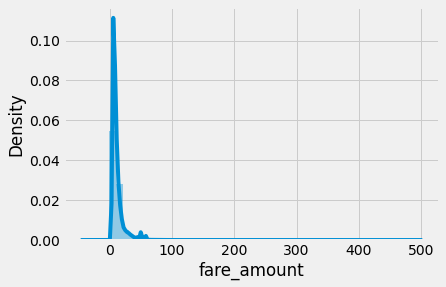

In [78]:
def plot_dist(series=df["fare_amount"], title="Fare Distribution"):
    sns.distplot(series,kde=True)
    
plot_dist()

C:\Users\fuetu\.virtualenvs\P15_mlflow-KVgOL1jZ\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


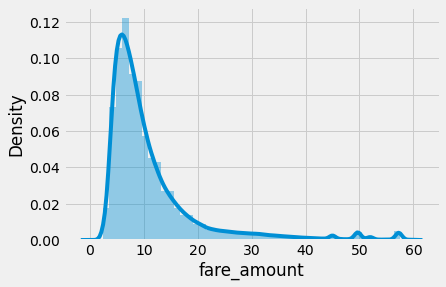

In [79]:
# drop absurd values 
df = df[df.fare_amount.between(0, 60)]
plot_dist(df.fare_amount)

In [81]:
import numpy as np 

# we can also visualize binned fare_amount variable
df['fare-bin'] = pd.cut(df['fare_amount'], bins = list(range(0, 50, 5)), include_lowest=True).astype('str')

# uppermost bin
# df['fare-bin'] = df['fare-bin'].fillna('[45+]')
df['fare-bin'] = df['fare-bin'].replace('nan', '[45+]')
# df.loc[df['fare-bin'] == np.nan, 'fare-bin'] = '[45+]'

# apply this to clean up the label of the first bin
df['fare-bin'] = df['fare-bin'].apply(lambda x: x.replace('-0.001', '0'))

# sort by fare the correct look in the chart
df = df.sort_values(by='fare_amount')

In [82]:
df

key  fare_amount          pickup_datetime  \
431819    2015-01-13 00:48:21.0000001          0.0  2015-01-13 00:48:21 UTC   
211455    2015-04-15 14:02:39.0000003          0.0  2015-04-15 14:02:39 UTC   
930680    2015-03-21 21:27:02.0000002          0.0  2015-03-21 21:27:02 UTC   
957590    2010-02-01 08:04:01.0000005          0.0  2010-02-01 08:04:01 UTC   
175352    2014-06-29 16:04:29.0000002          0.0  2014-06-29 16:04:29 UTC   
...                               ...          ...                      ...   
135905    2014-01-11 05:31:03.0000002         60.0  2014-01-11 05:31:03 UTC   
923366    2013-03-20 22:39:40.0000002         60.0  2013-03-20 22:39:40 UTC   
921921  2012-04-02 20:03:00.000000219         60.0  2012-04-02 20:03:00 UTC   
662327    2014-03-02 17:59:01.0000001         60.0  2014-03-02 17:59:01 UTC   
830946  2014-11-21 20:49:00.000000125         60.0  2014-11-21 20:49:00 UTC   

        pickup_longitude  pickup_latitude  dropoff_longitude  \
431819        -73.998383        40.759418         -74.031189   
211455        -73.937378        40.758450         -73.937447   
930680        -73.982101        40.770557           0.000000   
957590        -73.776286        40.645382         -73.776277   
175352        -73.484480        40.813401         -73.484442   
...                  ...              ...                ...   
135905        -74.030169        40.752271         -74.036110   
923366        -74.076436        40.762660         -74.076421   
921921        -74.074962        40.688120         -74.074962   
662327        -73.790495        40.646693         -73.790450   
830946        -73.786710        40.646730         -73.690220   

        dropoff_latitude  passenger_count  fare-bin  
431819         40.748924                1  (0, 5.0]  
211455         40.758450                1  (0, 5.0]  
930680          0.000000                2  (0, 5.0]  
957590         40.645351                1  (0, 5.0]  
175352         40.813323                2  (0, 5.0]  
...                  ...              ...       ...  
135905         40.748326                1     [45+]  
923366         40.762664                2     [45+]  
921921         40.688122                1     [45+]  
662327         40.646573                2     [45+]  
830946         40.586180                1     [45+]  

[997298 rows x 9 columns]

In [83]:
df.isna().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
fare-bin             0
dtype: int64

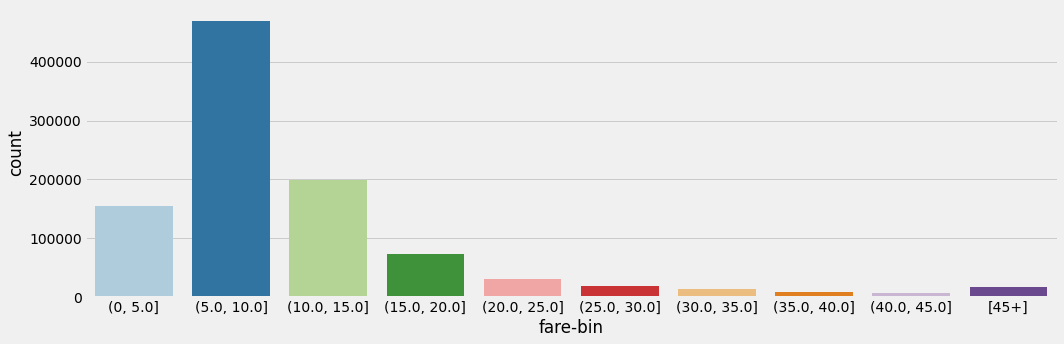

In [84]:
sns.catplot(x="fare-bin", kind="count", palette=palette, data=df, height=5, aspect=3);
sns.despine()
plt.show()

### Explore other variables

- passenger_count (statistics + distribution)
- pickup_datetime (you need to build time features out of the pickup datetime)
- Geospatial features (pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude)
- Find other variables that you can compute from existing data and that might explain the target

#### Passenger Count

In [85]:
df.passenger_count.describe()

count    997298.000000
mean          1.685106
std           1.324193
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         208.000000
Name: passenger_count, dtype: float64

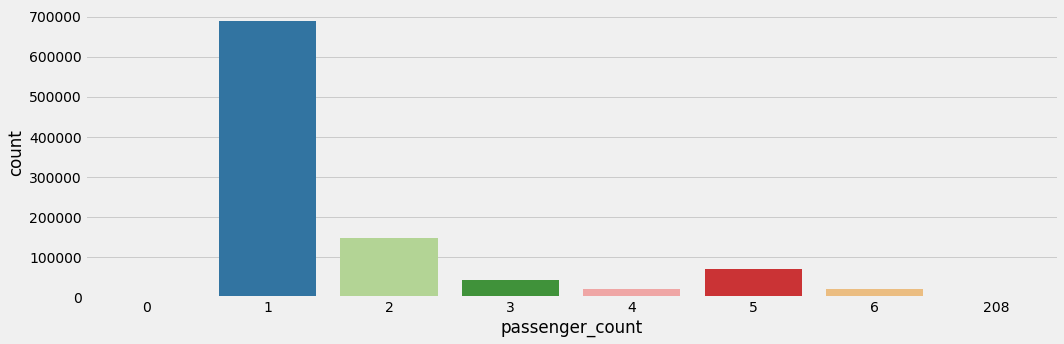

In [86]:
sns.catplot(x="passenger_count", kind="count", palette=palette, data=df, height=5, aspect=3)
sns.despine()
plt.show()

#### Pickup Datetime

- Extract time features from pickup_datetime (hour, day of week, month, year)
- Create a method `def extract_time_features(_df)` that you will be able to re-use later
- Be careful with the timezone
- Explore the newly created features 

In [101]:
df.head(3)

key  fare_amount          pickup_datetime  \
431819 2015-01-13 00:48:21.000000100          0.0  2015-01-13 00:48:21 UTC   
211455 2015-04-15 14:02:39.000000300          0.0  2015-04-15 14:02:39 UTC   
930680 2015-03-21 21:27:02.000000200          0.0  2015-03-21 21:27:02 UTC   

        pickup_longitude  pickup_latitude  dropoff_longitude  \
431819        -73.998383        40.759418         -74.031189   
211455        -73.937378        40.758450         -73.937447   
930680        -73.982101        40.770557           0.000000   

        dropoff_latitude  passenger_count  fare-bin  hour  dayofweek  
431819         40.748924                1  (0, 5.0]     0          1  
211455         40.758450                1  (0, 5.0]    14          2  
930680          0.000000                2  (0, 5.0]    21          5

In [ ]:
pd.to_datetime(df.pickup_datetime, format="%Y-%m-%d %H:%M:%S %Z").dt.strftime("%Z").value_counts()

In [ ]:
df["pickup_datetime"] = pd.to_datetime(df.pickup_datetime, format="%Y-%m-%d %H:%M:%S %Z")

In [343]:
def extract_time_features(df):
    df['key'] = pd.to_datetime(df['key'], format="%Y-%m-%d %H:%M:%S.%f").dt.tz_localize(tz='UTC').dt.tz_convert('America/New_York')
    df['hour'] = df['key'].dt.hour
    df['dow']=df['key'].dt.dayofweek
    return df

In [119]:
%%time
df['key'] = pd.to_datetime(df['key'], format="%Y-%m-%d %H:%M:%S.%f").dt.tz_localize(tz='UTC').dt.tz_convert('America/New_York')
df = extract_time_features(df)
# Wall time: 2min 9s

Wall time: 209 ms


In [116]:
df.dtypes

key                  datetime64[ns, America/New_York]
fare_amount                                   float64
pickup_datetime                   datetime64[ns, UTC]
pickup_longitude                              float64
pickup_latitude                               float64
dropoff_longitude                             float64
dropoff_latitude                              float64
passenger_count                                 int64
fare-bin                                       object
hour                                            int64
dayofweek                                       int64
dtype: object

In [121]:
df.head(3)

key  fare_amount  \
431819 2015-01-12 19:48:21.000000100-05:00          0.0   
211455 2015-04-15 10:02:39.000000300-04:00          0.0   
930680 2015-03-21 17:27:02.000000200-04:00          0.0   

                 pickup_datetime  pickup_longitude  pickup_latitude  \
431819 2015-01-13 00:48:21+00:00        -73.998383        40.759418   
211455 2015-04-15 14:02:39+00:00        -73.937378        40.758450   
930680 2015-03-21 21:27:02+00:00        -73.982101        40.770557   

        dropoff_longitude  dropoff_latitude  passenger_count  fare-bin  hour  \
431819         -74.031189         40.748924                1  (0, 5.0]    19   
211455         -73.937447         40.758450                1  (0, 5.0]    10   
930680           0.000000          0.000000                2  (0, 5.0]    17   

        dayofweek  
431819          0  
211455          2  
930680          5

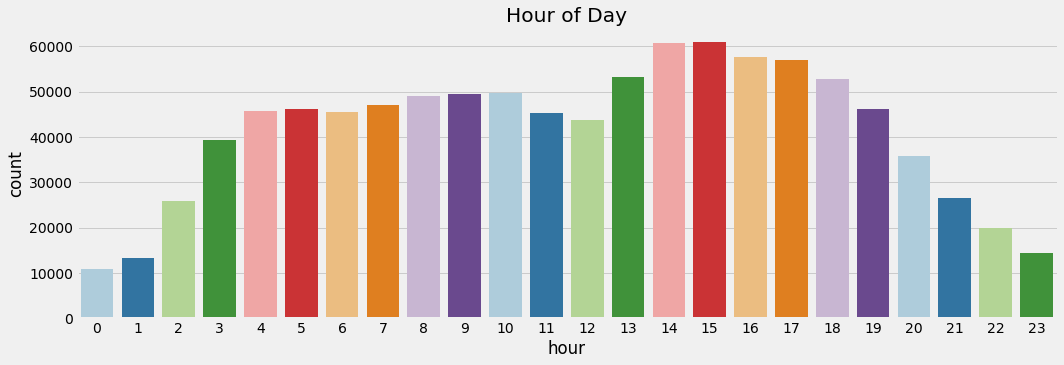

In [122]:
# Plot hour of day
sns.catplot(x="hour", kind="count", palette=palette, data=df, height=5, aspect=3);
sns.despine()
plt.title('Hour of Day');
plt.show()

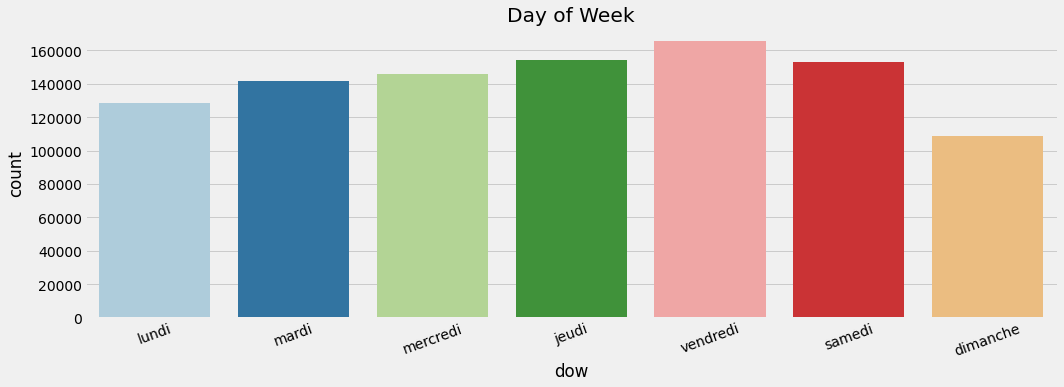

In [130]:
df.rename(columns={"dayofweek": "dow"},inplace = True)
#Plot  day of week
sns.catplot(x="dow", kind="count", palette=palette, data=df, height=5, aspect=3);
sns.despine()
labels = ['lundi','mardi','mercredi','jeudi','vendredi','samedi','dimanche']
plt.xticks([i for i in range(7)], labels, rotation=20)
plt.title('Day of Week');
plt.show()

#### Add timezone features

- Extract time features from pickup_datetime (hour, day of week, month, year)
- Create a method `def extract_time_features(_df)` that you will be able to re-use later
- Be careful of timezone
- Explore the newly created features

In [131]:
df_test = pd.read_csv("./data/test.csv")

In [132]:
# find the boudaries from the test set and remove the outliers from the training set
for col in ["pickup_latitude", "pickup_longitude", "dropoff_latitude", "dropoff_longitude"]:
    MIN = df_test[col].min()
    MAX = df_test[col].max()
    print(col, MIN, MAX)

pickup_latitude 40.573143 41.709555
pickup_longitude -74.252193 -72.986532
dropoff_latitude 40.568973 41.696683
dropoff_longitude -74.263242 -72.990963


In [133]:
df = df[df["pickup_latitude"].between(left = 40, right = 42 )]
df = df[df["pickup_longitude"].between(left = -74.3, right = -72.9 )]
df = df[df["dropoff_latitude"].between(left = 40, right = 42 )]
df = df[df["dropoff_longitude"].between(left = -74, right = -72.9 )]

In [ ]:
# make sure that you install folium first
! pip install folium

In [135]:
import folium
from folium.plugins import HeatMap

In [ ]:
lon, lat = -86.276, 30.935
zoom_start = 5

In [152]:
df[["pickup_latitude","pickup_longitude"]].shape

(847925, 2)

In [154]:
round(df[["pickup_latitude","pickup_longitude"]],3).drop_duplicates()

pickup_latitude  pickup_longitude
211455           40.758           -73.937
957590           40.645           -73.776
175352           40.813           -73.484
47302            40.806           -73.942
938020           40.719           -73.853
...                 ...               ...
981691           40.799           -73.923
73874            40.770           -74.000
923898           40.611           -73.982
210955           40.845           -73.972
423021           40.796           -73.672

[13196 rows x 2 columns]

In [167]:
m = folium.Map([40.77,-73.97], zoom_start=11)

(HeatMap(
    round(df[["pickup_latitude","pickup_longitude"]],4)
    .drop_duplicates(),min_opacity=0,max_opacity=0.6,
    gradient = {0.1:'blue', 0.6:'green',1:'yellow'})
    .add_to(folium.FeatureGroup(name='Heat Map').add_to(m)))

m

In [169]:

df[["pickup_latitude","pickup_longitude",'hour']]



pickup_latitude  pickup_longitude  hour
211455        40.758450        -73.937378    10
957590        40.645382        -73.776286     3
175352        40.813401        -73.484480    12
47302         40.806269        -73.942346    15
938020        40.718555        -73.852692    18
...                 ...               ...   ...
423021        40.796294        -73.671855    17
577296        40.731733        -74.003220    12
960755        40.774062        -73.874485    16
662327        40.646693        -73.790495    12
830946        40.646730        -73.786710    15

[847925 rows x 3 columns]

In [171]:
from folium.plugins import HeatMapWithTime

In [ ]:
for i  in range (25):
    print(i)

In [178]:
df.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'fare-bin', 'hour', 'dow'],
      dtype='object')

In [181]:

df_graph = df[['pickup_latitude', 'pickup_longitude','hour']].sample(n=5000)
lat_long_list = []
for i in range (25):
    temp=[]
    for index , instance in df_graph[df_graph['hour']==i].iterrows():
        temp.append([instance.pickup_latitude,instance.pickup_longitude])
    lat_long_list.append(temp)

In [184]:
df_graph['hour'] = pd.to_datetime(df_graph['hour'],format='%H')
df_graph['hour'].values

array(['1900-01-01T22:00:00.000000000', '1900-01-01T17:00:00.000000000',
       '1900-01-01T10:00:00.000000000', ...,
       '1900-01-01T15:00:00.000000000', '1900-01-01T10:00:00.000000000',
       '1900-01-01T10:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
m = folium.Map([40.77,-73.97], zoom_start=11)
HeatMapWithTime(lat_long_list,index=df['hour']).add_to(m)
m

In [188]:
m = folium.Map([40.77,-73.97], zoom_start=11)
HeatMapWithTime(lat_long_list,index=[i for i in range(25)]).add_to(m)
m

#### Distance

- Compute the distance between pickup and dropoff locations (tip: https://en.wikipedia.org/wiki/Haversine_formula)
- Write a method `def haversine_distance(df, **kwargs)` that you will be able to reuse later
- Compute a few statistics for distance and plot distance distribution

In [194]:
np.radians(52.406374)
lala2 = 16.9251681
lala1 = 21.0122287

lon1 = np.radians(21.0122287)
lon2 = np.radians(16.9251681)

dlon = lon2 - lon1
print(dlon)

np.radians(lala2-lala1)

-0.07133266419853496


-0.07133266419853497

In [ ]:
import numpy as np
def haversine_distance(df,
                       start_lat,
                       start_lon,
                       end_lat,
                       end_lon):
    R = 6373.0
    lat1 = np.radians(start_lat)
    lon1 = np.radians(start_lon)
    lat2 = np.radians(end_lat)
    lon2 = np.radians(end_lon)
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.atan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

In [202]:
from math import sin, cos, sqrt, atan2, radians
def calculate_distance(lat1, lon1, lat2, lon2):
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c






import numpy as np
def haversine_distance(df,
                       start_lat="start_lat",
                       start_lon="start_lon",
                       end_lat="end_lat",
                       end_lon="end_lon"):
    R = 6373.0
    lat1 = df[start_lat].apply(np.radians)
    lon1 = df[start_lon].apply(np.radians)
    lat2 = df[end_lat].apply(np.radians)
    lon2 = df[end_lon].apply(np.radians)

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees).
    Vectorized version of the haversine distance for pandas df
    Computes distance in kms
    """

# df["distance"] = haversine_distance(df, 
#                                     start_lat="pickup_latitude", start_lon="pickup_longitude",
#                                     end_lat="dropoff_latitude", end_lon="dropoff_longitude")

In [205]:
df["distance"] = haversine_distance(df, 
                                    start_lat="pickup_latitude", start_lon="pickup_longitude",
                                    end_lat="dropoff_latitude", end_lon="dropoff_longitude")

In [211]:
df[["pickup_latitude","pickup_longitude","dropoff_latitude","dropoff_longitude",'distance']].head(5)

pickup_latitude  pickup_longitude  dropoff_latitude  \
211455        40.758450        -73.937378         40.758450   
957590        40.645382        -73.776286         40.645351   
175352        40.813401        -73.484480         40.813323   
47302         40.806269        -73.942346         40.806129   
938020        40.718555        -73.852692         40.718559   

        dropoff_longitude  distance  
211455         -73.937447  0.005785  
957590         -73.776277  0.003531  
175352         -73.484442  0.009247  
47302          -73.942463  0.018426  
938020         -73.852699  0.000771

In [218]:
import geopy.distance

coords_1 = (40.758450, -73.937378)
coords_2 = (40.758450, -73.937447)
geopy.distance.geodesic(coords_1, coords_2).km

0.005826469744263188

In [219]:
df.distance.describe()

count    847925.000000
mean          3.289426
std           3.718563
min           0.000000
25%           1.236613
50%           2.113215
75%           3.838481
max         104.287696
Name: distance, dtype: float64

In [27]:
df.distance.describe()

count    847916.000000
mean          3.288393
std           3.717411
min           0.000000
25%           1.236222
50%           2.112549
75%           3.837169
max         104.254968
Name: distance, dtype: float64

C:\Users\fuetu\.virtualenvs\P15_mlflow-KVgOL1jZ\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


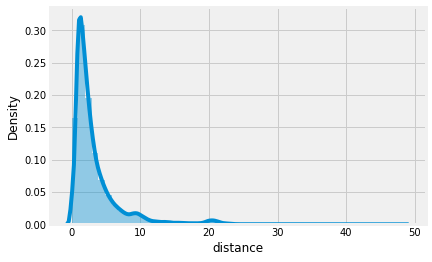

In [220]:
%matplotlib inline
plot_dist(series=df[df.distance < 50].distance, title='Distance distribution')

#### Explore how target variable correlate with other variables

- As a first step, you can visualize the target variable vs another variable. For categorical variables, it is often useful to compute the average target variable for each category (Seaborn has plots that do it for you!). For continuous variables (like distance, you can use scatter plots, or regression plots, or bucket the distance into different bins
- But there many different ways to visualize correlation between features, so be creative

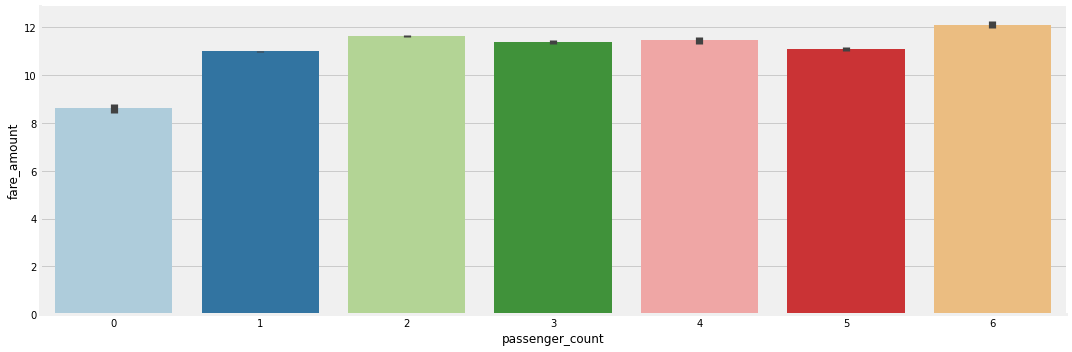

In [221]:
sns.catplot(x="passenger_count", y="fare_amount", palette=palette, data=df, kind="bar", aspect=3)
sns.despine()
plt.show()

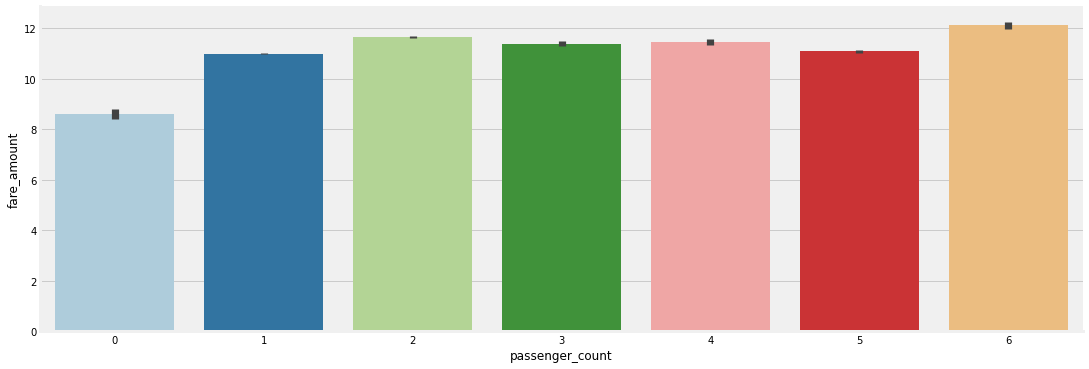

In [29]:
sns.catplot(x="passenger_count", y="fare_amount", palette=palette, data=df, kind="bar", aspect=3)
sns.despine()
plt.show()

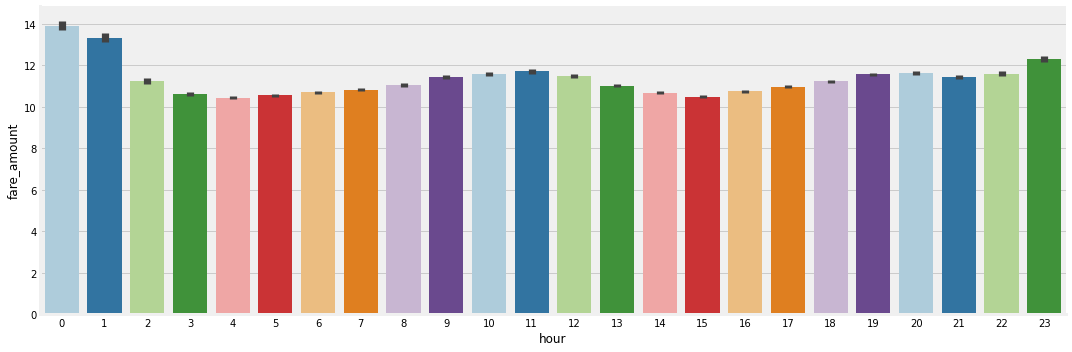

In [222]:
sns.catplot(x="hour", y="fare_amount", palette=palette, data=df, kind="bar", aspect=3)
sns.despine()
plt.show()

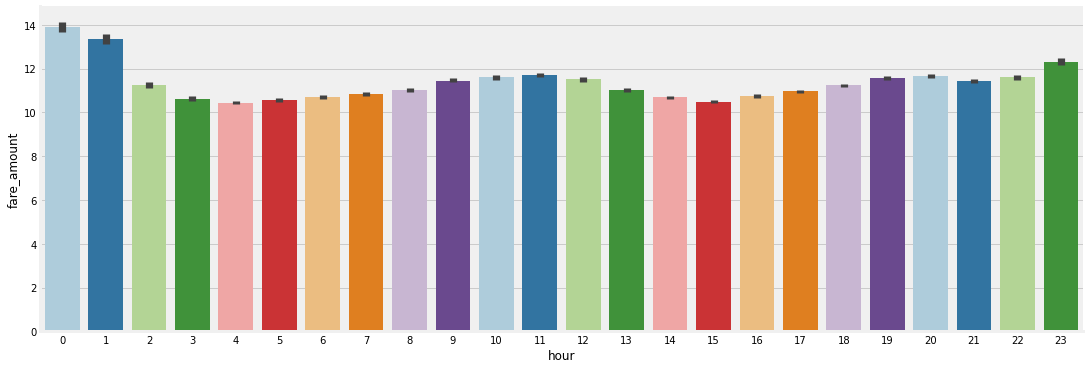

In [30]:
sns.catplot(x="hour", y="fare_amount", palette=palette, data=df, kind="bar", aspect=3)
sns.despine()
plt.show()

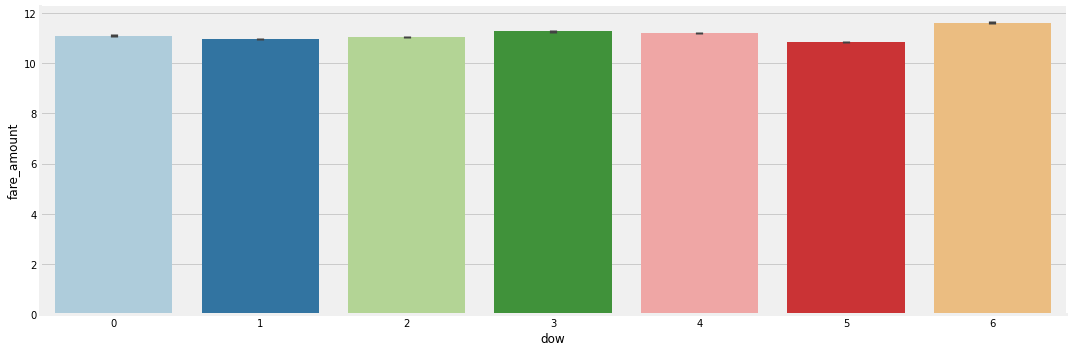

In [340]:
sns.catplot(x="dow", y="fare_amount", palette=palette, data=df, kind="bar", aspect=3)
sns.despine()
plt.show()

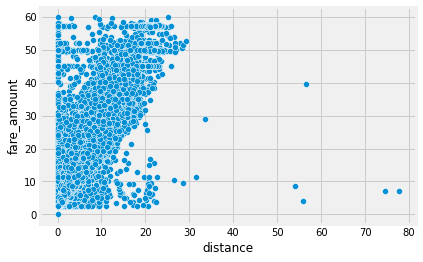

In [32]:
sns.scatterplot(x="distance", y="fare_amount", data=df[df.distance < 80].sample(100000))
plt.show()

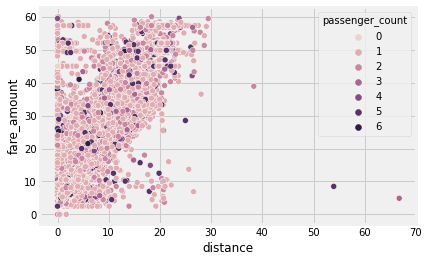

In [33]:
sns.scatterplot(x="distance", y="fare_amount", hue="passenger_count", data=df[df.distance < 80].sample(100000))
plt.show()

## 3. Data cleaning <a id='part3'></a>

As you probably saw in the previous section during your data exploration, there are some values that do not seem valid.
In this section, you will take a few steps to clean the training data.

Remove all the trips that look incorrect. We recommend that you write a method called `clean_data(df)` that you will be able to re-use in the next steps.

In [223]:
print("trips with negative fares:", len(df[df.fare_amount <= 0]))
print("trips with too high distance:", len(df[df.distance >= 100]))
print("trips with too many passengers:", len(df[df.passenger_count > 8]))
print("trips with zero passenger:", len(df[df.passenger_count == 0]))

trips with negative fares: 18
trips with too high distance: 16
trips with too many passengers: 0
trips with zero passenger: 2999


In [353]:
df[df['distance']>80]

key  fare_amount  \
1684   2009-05-02 15:01:01.000000200-04:00         2.50   
437722 2009-07-23 02:44:21.000000100-04:00         2.50   
367789 2009-05-29 08:48:06.000000600-04:00         2.50   
659831 2009-11-05 11:58:45.000000100-05:00         2.50   
314318 2010-06-16 12:42:26.000000300-04:00         2.90   
...                                    ...          ...   
657510 2009-05-10 09:01:42.000000300-04:00        49.15   
414615 2010-05-03 13:23:32.000000300-04:00        49.57   
679381 2009-08-27 05:09:00.000000182-04:00        49.57   
104419 2009-09-20 06:11:36.000000100-04:00        49.57   
672428 2010-06-08 19:42:45.000000100-04:00        49.57   

                 pickup_datetime  pickup_longitude  pickup_latitude  \
1684   2009-05-02 19:01:01+00:00        -73.137393        41.366138   
437722 2009-07-23 06:44:21+00:00        -73.137393        41.366138   
367789 2009-05-29 12:48:06+00:00        -73.980449        40.779187   
659831 2009-11-05 16:58:45+00:00        -73.137393        41.366138   
314318 2010-06-16 16:42:26+00:00        -73.137393        41.366138   
...                          ...               ...              ...   
657510 2009-05-10 13:01:42+00:00        -73.781654        40.644849   
414615 2010-05-03 17:23:32+00:00        -73.137393        41.366138   
679381 2009-08-27 09:09:00+00:00        -73.137393        41.366138   
104419 2009-09-20 10:11:36+00:00        -73.137393        41.366138   
672428 2010-06-08 23:42:45+00:00        -73.137393        41.366138   

        dropoff_longitude  dropoff_latitude  passenger_count  fare-bin  hour  \
1684           -73.996510         40.745320                2  (0, 5.0]    15   
437722         -73.794185         40.657101                2  (0, 5.0]     2   
367789         -73.137393         41.366138                1  (0, 5.0]     8   
659831         -73.963465         40.768066                1  (0, 5.0]    11   
314318         -73.950246         40.752764                1  (0, 5.0]    12   
...                   ...               ...              ...       ...   ...   
657510         -73.137393         41.366138                1     [45+]     9   
414615         -73.919664         40.865828                3     [45+]    13   
679381         -73.778717         40.646786                4     [45+]     5   
104419         -73.790632         40.646248                1     [45+]     6   
672428         -73.973793         40.756137                1     [45+]    19   

        dow   distance  
1684      5  99.802900  
437722    3  96.221279  
367789    4  96.227235  
659831    3  96.042766  
314318    2  96.448331  
...     ...        ...  
657510    6  96.752483  
414615    0  85.987983  
679381    3  96.435636  
104419    6  97.046930  
672428    1  97.591698  

[116 rows x 12 columns]

In [235]:
def clean_data(df, test=False):
    df = df[
        (df.fare_amount > 0) &
        (df.distance < 100) &
        (df.passenger_count <= 8) &
        (df.passenger_count > 0)
        ]
    return df

df_cleaned = clean_data(df)
"% data removed", (1 - len(df_cleaned) / len(df)) * 100

('% data removed', 0.3576967302532652)

In [236]:
df_cleaned.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'fare-bin', 'hour', 'dow', 'distance'],
      dtype='object')

## 4. Evaluation metric <a id='part4'></a>

The evaluation metric for this competition is the root mean-squared error or RMSE. The RMSE measures the difference between the predictions of a model, and the corresponding ground truth. A large RMSE is equivalent to a large average error, so smaller values of RMSE are better.

More details here https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview/evaluation

Write a method `def compute_rmse(y_pred, y_true)` that computes the RMSE given `y_pred` and `y_true` which are two numpy arrays corresponding to model predictions and ground truth values.

This method will be useful in order to evaluate the performance of your model.

In [237]:
def compute_rmse(y_pred, y_true):
    return np.sqrt(((y_pred - y_true) ** 2).mean())

## 5. Model baseline <a id='part5'></a>

Before building your model, it is often useful to get a performance benchmark. For this, you will use a baseline model that is a very dumb model and compute the evaluation metric on that model.
Then, you will be able to see how much better your model is compared to the baseline. It is very common to see ML teams coming up with very sophisticated approaches without knowing by how much their model beats the very simple model.

- Generate predictions based on a simple heuristic
- Evaluate the RMSE for these predictions

In [240]:
compute_rmse(df.fare_amount.mean(), df.fare_amount)

8.989111519781266

8.989136548955917

## 6. Build your first model <a id='part6'></a>

Now it is time to build your model!

For starters we are going to use a linear model only. We will try more sophisticated models later.

Here are the different steps that you have to follow:

1. Split the data into two different sets (training and validation). You will be measuring the performance of your model on the validation set
2. Make sure that you apply the data cleaning on your training set
3. Think about the different features you want to add in your model
4. For each of these features, make sure you apply the correct transformation so that the model can correctly learn from them (this is true for categorical variables like `hour of day` or `day of week`)
5. Train your model

##### Training/Validation Split

In [254]:
# training/validation
from sklearn.model_selection import train_test_split
df_train, df_val = train_test_split(df, test_size=0.1)

##### Apply data cleaning on training set

In [255]:
df_train = clean_data(df_train)

##### List features (continuous vs categorical)

In [256]:
# features
target = "fare_amount"
features = ["distance", "hour", "dow", "passenger_count"]
categorical_features = ["hour", "dow"]

In [258]:
df_train.head(5)

key  fare_amount  \
927841 2009-03-11 03:56:33.000000500-04:00          9.7   
997453 2015-03-12 10:59:53.000000200-04:00          9.0   
312897 2010-03-18 03:02:00.000000960-04:00          6.9   
426259 2009-06-15 09:40:50.000000100-04:00          7.3   
532594 2012-06-27 03:25:26.000000100-04:00          4.9   

                 pickup_datetime  pickup_longitude  pickup_latitude  \
927841 2009-03-11 07:56:33+00:00        -73.953820        40.775413   
997453 2015-03-12 14:59:53+00:00        -73.988823        40.736374   
312897 2010-03-18 07:02:00+00:00        -73.945632        40.774497   
426259 2009-06-15 13:40:50+00:00        -73.995877        40.744574   
532594 2012-06-27 07:25:26+00:00        -73.994672        40.750448   

        dropoff_longitude  dropoff_latitude  passenger_count     fare-bin  \
927841         -73.979742         40.752823                1  (5.0, 10.0]   
997453         -73.972740         40.736729                1  (5.0, 10.0]   
312897         -73.973090         40.765593                1  (5.0, 10.0]   
426259         -73.979979         40.762151                1  (5.0, 10.0]   
532594         -73.985796         40.758928                1     (0, 5.0]   

        hour  dow  distance  
927841     3    2  3.329062  
997453    10    3  1.356044  
312897     3    3  2.516134  
426259     9    0  2.369975  
532594     3    2  1.203742

##### Features transformation

- Write a method `def transform_features(df, **kwargs)` because you will have to make sure that you apply the same transformations on the validation (or test set) before making predictions
- For categorical features transformation, you can use `pandas.get_dummies` method

In [259]:
df_train.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'fare-bin', 'hour', 'dow', 'distance'],
      dtype='object')

In [ ]:
pd.get_dummies(df, columns=['dow','hour'])

In [287]:
df.dtypes

key                  datetime64[ns, America/New_York]
fare_amount                                   float64
pickup_datetime                   datetime64[ns, UTC]
pickup_longitude                              float64
pickup_latitude                               float64
dropoff_longitude                             float64
dropoff_latitude                              float64
passenger_count                                 int64
fare-bin                                       object
hour                                            int64
dow                                             int64
distance                                      float64
dtype: object

In [315]:
def transform_features(_df, dummy_features=None):
    
    _df = pd.get_dummies(_df[features], columns=dummy_features)
    dummy_features = _df.columns
    return _df, dummy_features

##### Model training

In [316]:
features

['distance', 'hour', 'dow', 'passenger_count']

In [336]:
# model training
cat_features = ["hour", "dow"]
from sklearn.linear_model import LassoCV
model = LassoCV(cv=5, n_alphas=5)
X_train, dummy_features = transform_features(df_train, cat_features)
X_train = X_train[dummy_features]
y_train = df_train.fare_amount
model.fit(X_train, y_train)

LassoCV(cv=5, n_alphas=5)

## 7. Model evaluation <a id='part7'></a>

Now in order to evaluate your model, you need to use your previously trained model in order to make predictions on the validation set.

For this, follow these steps:
1. Apply the same transformations on the validation set
2. Make predictions
3. Evaluate predictions using `compute_rmse` method

In [319]:
dummy_features

Index(['distance', 'passenger_count', 'hour_0', 'hour_1', 'hour_2', 'hour_3',
       'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10',
       'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16',
       'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22',
       'hour_23', 'dow_0', 'dow_1', 'dow_2', 'dow_3', 'dow_4', 'dow_5',
       'dow_6'],
      dtype='object')

key                   object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [329]:
df_test.dtypes

key                   object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [ ]:
df_test = clean_data(df_test)
X_test, dummy_features = transform_features(df_test, cat_features)
X_test = X_test[dummy_features]
df_test["y_pred"] = model.predict(X_test)
# compute_rmse(df_test.y_pred, df_test.fare_amount)

In [296]:
# X_val, _ = transform_features(df_val, dummy_features=dummy_features)
X_test = df_test[features]
df_test["y_pred"] = model.predict(X_test)
compute_rmse(df_test.y_pred, df_test.fare_amount)

4.887881064287283

## Flo ----- Flo ----- Flo 

### Fonctions

In [ ]:
# import pandas as pd
# import numpy as np

# def extract_time_features(df):
#     df['key'] = pd.to_datetime(df['key'], format="%Y-%m-%d %H:%M:%S.%f").dt.tz_localize(tz='UTC').dt.tz_convert('America/New_York')
#     df['hour'] = df['key'].dt.hour
#     df['dow']=df['key'].dt.dayofweek
#     return df

# def haversine_distance(df,
#                        start_lat="start_lat",
#                        start_lon="start_lon",
#                        end_lat="end_lat",
#                        end_lon="end_lon"):
#     R = 6373.0
#     lat1 = df[start_lat].apply(np.radians)
#     lon1 = df[start_lon].apply(np.radians)
#     lat2 = df[end_lat].apply(np.radians)
#     lon2 = df[end_lon].apply(np.radians)

#     dlon = lon2 - lon1
#     dlat = lat2 - lat1
#     a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
#     c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
#     distance = R * c
#     return distance

# def clean_data(df, test=False):
#     df = df[
#         (df.fare_amount > 0) &
#         (df.distance < 100) &
#         (df.passenger_count <= 8) &
#         (df.passenger_count > 0)
#         ]
#     return df


# def transform_features(_df, dummy_features=None):
#     _df = pd.get_dummies(_df[features], columns=dummy_features)
#     dummy_features = _df.columns
#     return _df, dummy_features


# def preprocessing(df):
#     df = df.dropna()
#     df = clean_data(df)
#     df["distance"] = haversine_distance(df, 
#                                     start_lat="pickup_latitude", start_lon="pickup_longitude",
#                                     end_lat="dropoff_latitude", end_lon="dropoff_longitude")

#     target = "fare_amount"
#     features = ["distance", "hour", "dow", "passenger_count"]
#     categorical_features = ["hour", "dow"]
    
#     X, columns_X  = transform_features(df[features],categorical_features)
#     y = df.fare_amount
    
#     return X, y

## 8. Kaggle submission <a id='part8'></a>

Now that you have a model, you can now make predictions on Kaggle test set and be evaluated by Kaggle directly.

- Download the test data from Kaggle
- Follow the [instructions](https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview/evaluation) to make sure that your predictions are in the right format
- Re-train your model using all the data (do not split with train/validation)
- Apply the feature engineering and transformation methods on the test set
- Use the model to make predictions on the test set
- Submit your predictions!

In [298]:
# Re-train the model with all the data
df_cleaned = clean_data(df)
X = df_cleaned[features]
y = df_cleaned.fare_amount

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=5)
lasso.fit(X,y)

Lasso(alpha=5)

In [347]:
# load Kaggle's test set
df_test = pd.read_csv("./data/test.csv")
df_test.dtypes

key                   object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [348]:
df_test.head(2)

key          pickup_datetime  pickup_longitude  \
0  2015-01-27 13:08:24.0000002  2015-01-27 13:08:24 UTC        -73.973320   
1  2015-01-27 13:08:24.0000003  2015-01-27 13:08:24 UTC        -73.986862   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
0        40.763805         -73.981430         40.743835                1  
1        40.719383         -73.998886         40.739201                1

In [349]:
# feature engineering
df_test["distance"] = haversine_distance(df_test, 
                                         start_lat="pickup_latitude", start_lon="pickup_longitude",
                                         end_lat="dropoff_latitude", end_lon="pickup_longitude")
                                         
df_test = extract_time_features(df_test)
# X_test, _ = transform_features(df_test, dummy_features=dummy_features) 
X_test = df_test[features]

# prediction
df_test["y_pred"] = lasso.predict(X_test)

In [49]:
df_test.head(1)

key          pickup_datetime  pickup_longitude  \
0  2015-01-27 13:08:24.0000002  2015-01-27 13:08:24 UTC         -73.97332   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
0        40.763805          -73.98143         40.743835                1   

   distance  dow  hour  month  year    y_pred  
0  2.220556    1     8      1  2015  9.329551

In [351]:
df_test.reset_index(drop=True)[["key", "y_pred"]].rename(columns={"y_pred": "fare_amount"}).to_csv("lasso_v0_predictions.csv", index=False)

## 9. [OPTIONAL] Push further Feature Engineering <a id='part9'></a>

You can improve your model by trying different things (But do not worry, some of these things will be covered during the next days).
- Use more data to train
- Build and add more features
- Try different estimators
- Adjust your data cleaning to remove more or less data
- Tune the hyperparameters of your model

In the following section we will focus on advanced feature engineering (keep in mind that relevant feateng is often key to significant increase in model performances):

👉 **Manhattan distance** better suited to our problem  
👉 **Distance to NYC center** to highlight interesting pattern...
👉 **Direction**

###### Another Distance ?
- Think about the distance you used, try and find a more adapted distance for our problem (ask TAs for insights)

$$D(A,B) = \left( \sum_{i=1}^{n} \lvert x_{A_i} - x_{B_i} \rvert ^p \right)^\frac{1}{p}$$
with $A=(x_{A_1}, x_{A_2}, ..., x_{A_n})$ and $B=(x_{B_1}, x_{B_2}, ..., x_{B_n})$

In [51]:
# the Minkowski Distance is actually the generic distance to compute different distances

# in a cartesion system of reference of 2 dimensions (x,y), the Minkowski distance can be implemented as follow:
def minkowski_distance(x1, x2, y1, y2, p):
   

In [52]:
# in a GPS coordinates system, the Minkowksi distance should be implented as follows:
# convert degrees to radians
def deg2rad(coordinate):
    return 

# convert radians into distance
def rad2dist(coordinate):
   
    return 

# correct the longitude distance regarding the latitude (https://jonisalonen.com/2014/computing-distance-between-coordinates-can-be-simple-and-fast/)
def lng_dist_corrected(lng_dist, lat):
    return 

def minkowski_distance_gps(lat1, lat2, lon1, lon2, p):
 
    return minkowski_distance(x1, x2, y1, y2, p)

In [53]:
# manhattan distance <=> minkowski_distance(x1, x2, y1, y2, 1)
df['manhattan_dist'] = minkowski_distance_gps(df['pickup_latitude'], df['dropoff_latitude'],
                                              df['pickup_longitude'], df['dropoff_longitude'], 1)

In [54]:
# euclidian distance <=> minkowski_distance(x1, x2, y1, y2, 2)
df['euclidian_dist'] = minkowski_distance_gps(df['pickup_latitude'], df['dropoff_latitude'],
                                              df['pickup_longitude'], df['dropoff_longitude'], 2)

In [55]:
df.head()

key  fare_amount          pickup_datetime  \
0  2015-04-15 14:02:39.0000003          0.0  2015-04-15 14:02:39 UTC   
2  2010-02-20 09:51:27.0000004          0.0  2010-02-20 09:51:27 UTC   
3  2015-05-27 23:10:03.0000004          0.0  2015-05-27 23:10:03 UTC   
4  2013-08-05 06:45:54.0000005          0.0  2013-08-05 06:45:54 UTC   
5  2015-05-26 12:28:03.0000003          0.0  2015-05-26 12:28:03 UTC   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.937378        40.758450         -73.937447         40.758450   
2        -73.877376        40.772415         -73.877403         40.772391   
3        -73.994125        40.741131         -73.994125         40.741131   
4        -73.982354        40.679971         -73.982354         40.679971   
5        -73.986473        40.721909         -73.986473         40.721905   

   passenger_count  fare-bin  dow  hour  month  year  count  distance  \
0                1  (0, 5.0]    2    10      4  2015      1  0.005783   
2                1  (0, 5.0]    5     4      2  2010      1  0.003506   
3                1  (0, 5.0]    2    19      5  2015      1  0.000000   
4                1  (0, 5.0]    0     2      8  2013      1  0.000000   
5                1  (0, 5.0]    1     8      5  2015      1  0.000424   

      y_pred  manhattan_dist  euclidian_dist  
0  11.136315        0.005783        0.005783  
2  11.136315        0.007189        0.005250  
3  11.136315        0.000000        0.000000  
4  11.136315        0.000000        0.000000  
5  11.136315        0.000782        0.000555

###### Distance from the center 

- Compute a new feature calculating the distance of pickup location from the center
- Scatter Plot *distance_from_center* regarding *distance* 
- What do you observe ? What new features could you add ? How are these new features correlated to the target ?

In [58]:
# let's compute the distance from the NYC center
# A COMPLETER

df['distance_to_center'] = haversine_distance(df, **args)

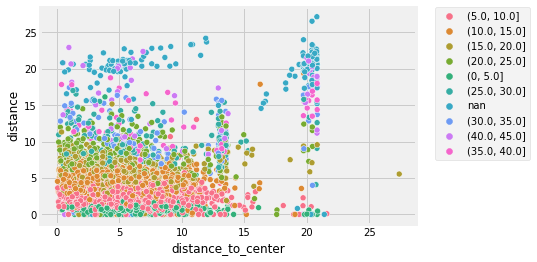

In [59]:
idx = (df.distance < 40) & (df.distance_to_center < 40)
sns.scatterplot(x="distance_to_center", y="distance", data=df[idx].sample(10000), hue="fare-bin")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

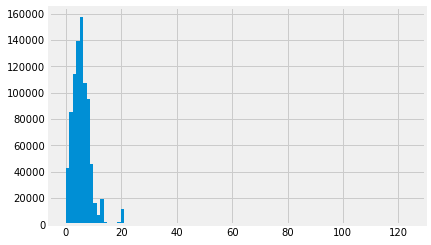

In [60]:
df.distance_to_center.hist(bins=100)

👉 **Take some time to step back and try to observe an interesting pattern here. What are these clusters with a similar distance to the center?**

In [61]:
# seems to be fixed distance_to_center


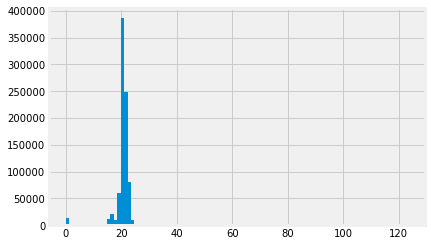

In [62]:
df.pickup_distance_to_jfk.hist(bins=100)

###### Which direction  are you heading to ?

- Compute a new feature calculating the direction your are heading to
- What do you observe ? What new features could you add ? How are these new features correlated to the target ?

In [63]:
def calculate_direction(d_lon, d_lat):

    return result

In [64]:
df['delta_lon'] = df.pickup_longitude - df.dropoff_longitude
df['delta_lat'] = df.pickup_latitude - df.dropoff_latitude
df['direction'] = calculate_direction(df.delta_lon, df.delta_lat)

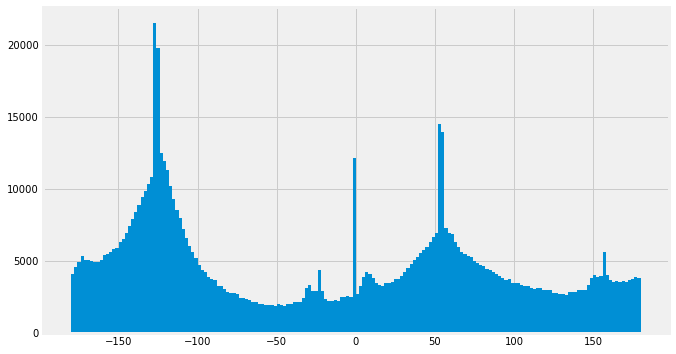

In [65]:
plt.figure(figsize=(10,6))
df.direction.hist(bins=180)

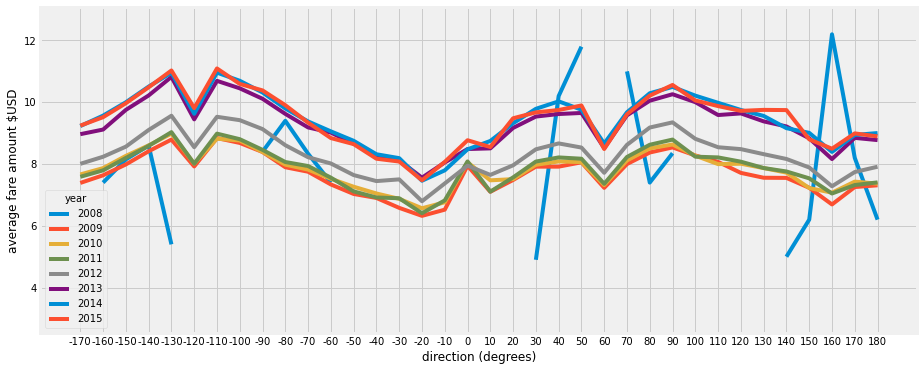

In [66]:
# plot direction vs average fare amount for fares inside manhattan
def select_within_boundingbox(df, BB):
    return (df.pickup_longitude >= BB[0]) & (df.pickup_longitude <= BB[1]) & \
           (df.pickup_latitude >= BB[2]) & (df.pickup_latitude <= BB[3]) & \
           (df.dropoff_longitude >= BB[0]) & (df.dropoff_longitude <= BB[1]) & \
           (df.dropoff_latitude >= BB[2]) & (df.dropoff_latitude <= BB[3])
BB_manhattan = (-74.025, -73.925, 40.7, 40.8)
idx_manhattan = select_within_boundingbox(df, BB_manhattan)

fig, ax = plt.subplots(1, 1, figsize=(14,6))
direc = pd.cut(df[idx_manhattan]['direction'], np.linspace(-180, 180, 37))
df[idx_manhattan].pivot_table('fare_amount', index=[direc], columns='year', aggfunc='mean').plot(ax=ax)
plt.xlabel('direction (degrees)')
plt.xticks(range(36), np.arange(-170, 190, 10))
plt.ylabel('average fare amount $USD');

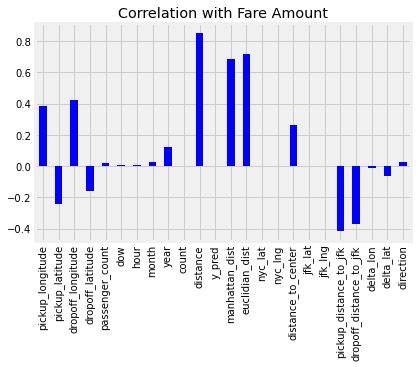

In [67]:
corrs = df.corr()
l = list(corrs)
l.remove("fare_amount")
corrs['fare_amount'][l].plot.bar(color = 'b');
plt.title('Correlation with Fare Amount');